# Preparing Data

In [1]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2022):
    dfs.append(pd.read_csv(f"./{i}_lake_data.csv"))

df = pd.concat(dfs)
df

,STN Code,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,8.4,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [3]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765.0,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
1089,2544.0,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
1090,2522.0,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13,29,1.0,1.1,0.30,0.30,70,110,110,210
1091,2521.0,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [4]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
# df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.drop(columns=["Type Water Body"])
df = df.astype({"STN Code":int})
df


,STN Code,Name of Monitoring Location,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,"PULICATE LAKE , NELLORE \nDIST.",ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,"MER BEEL AT MADHABPUR, \nASSAM",ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,"KAWAR LAKE, BEGUSARAI, \nBIHAR",BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
1089,2544,SAHEBBANDH AT PURULIA,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
1090,2522,SINCHAL LAKE FOR DARJEELING,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
1091,2521,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [13]:
locations = [(i.replace("\n", ""), j) for i, j in zip(df["Name of Monitoring Location"], df["State Name"])]
location_names = [i[0] for i in locations]
print(location_names)

['PULICATE LAKE , NELLORE DIST.', 'KONDACHARLA-AAVA LAKE, PARAWADA PHARMA CITY, VISHAKHAPATNAM, A.P', 'MER BEEL AT MADHABPUR, ASSAM', 'DALONI BEEL NEAR JOGIGHOPA, ASSAM', 'KAWAR LAKE, BEGUSARAI, BIHAR', 'MOTI JHEEL AT MOTIHARII, BIHAR', 'SUKHNA LAKE, CHANDIGARH', 'SALAULIM LAKE AT SALAULIM - SANGUEM, GOA', 'MAYEM LAKE, BICHOLIM', 'ANJUNEM LAKE', 'RUMDER LAKE', 'CARAMBOLIM LAKE', 'RAIA LAKE', 'SAIPEM LAKE', 'CURTORIM LAKE', 'KANKORIA LAKE AT AHMEDABAD, NR. BALVATIKA, GUJARAT', 'CHANDOLA LAKE AT AHMEDABAD, GUJARAT', 'AJWAH LAKE AT SRI SAYAJI SABVAR, BARODA, GUJARAT', 'SURSAGAR LAKE AT BARODA, GUJARAT', 'NALSAROVAR LAKE (SANAND), DIST.AHMEDABAD', 'BINDUSAROVAR, SIDDHPUR (DIST.PATAN)', 'LAKHOTA TALAV, JAMNAGAR', 'NARSIMEHTA TALAV- JUNAGADH', 'CITY LAKE OF NADIAD', 'RANJITNAGAR TALAV (HALOL), PANCHMAHALS', 'DHAROI DAM, DIST. MEHSANA.', 'ANKLESHWAR RESERVOIR AT GIDC ANKLESHWAR AT VALIA ROAD.', 'MOTICHER LAKE NEAR KAKARPAR ATOMIC POWER STATION, DIST. SURAT.', 'KUWADAVA LAKE, VILL. KUWADAVA, D

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialize the geocoder
geolocator = Nominatim(user_agent="anyapi")
STATE_DETERMINED = []
FULLY_FAILED = []
RAISED_ERROR = []
# Function to get coordinates for US cities considering both city and state
def get_coordinates(loc, state):
    global STATE_DETERMINED, FULLY_FAILED, RAISED_ERROR
    try:
        # Specify both city and state in the query string
        query = loc.split(",")[0].strip()
        location = geolocator.geocode(query)
        for i in loc.split(","):
            query = i.strip()
            location = geolocator.geocode(query)
            if location:
                break
        if not location:
            print(f"First Attempt FAILED at {loc}, {state}")
            location = geolocator.geocode(state)
            if not (loc, state) in STATE_DETERMINED: 
                STATE_DETERMINED += [(loc, state)] 
        
        if location:
            if (loc, state) in RAISED_ERROR:
                RAISED_ERROR.remove((loc, state))
            return location.latitude, location.longitude
        else:
            if not (loc, state) in FULLY_FAILED:
                FULLY_FAILED += [(loc, state)] 
            return None, None
    except Exception as e:
        print(f"Error fetching coordinates for {loc}, {state}: {e}")
        if not (loc, state) in RAISED_ERROR:
            RAISED_ERROR += [(loc, state)] 
        return None, None

location_coords_geopy = []
for i in range(len(locations)):
    location_name, state_name = locations[i]
    print(f"PROCESSING #{i}: {location_name}, {state_name}\n{'='*40}")
    location_coords_geopy += [get_coordinates(location_name, state_name)]
    print(f"{'='*40}")

PROCESSING #0: PULICATE LAKE , NELLORE DIST., ANDHRA 
PRADESH
PROCESSING #1: KONDACHARLA-AAVA LAKE, PARAWADA PHARMA CITY, VISHAKHAPATNAM, A.P, ANDHRA 
PRADESH
PROCESSING #2: MER BEEL AT MADHABPUR, ASSAM, ASSAM
PROCESSING #3: DALONI BEEL NEAR JOGIGHOPA, ASSAM, ASSAM
PROCESSING #4: KAWAR LAKE, BEGUSARAI, BIHAR, BIHAR
PROCESSING #5: MOTI JHEEL AT MOTIHARII, BIHAR, BIHAR
PROCESSING #6: SUKHNA LAKE, CHANDIGARH, CHANDIGARH
PROCESSING #7: SALAULIM LAKE AT SALAULIM - SANGUEM, GOA, GOA
PROCESSING #8: MAYEM LAKE, BICHOLIM, GOA
PROCESSING #9: ANJUNEM LAKE, GOA
First Attempt FAILED at ANJUNEM LAKE, GOA
PROCESSING #10: RUMDER LAKE, GOA
First Attempt FAILED at RUMDER LAKE, GOA
PROCESSING #11: CARAMBOLIM LAKE, GOA
First Attempt FAILED at CARAMBOLIM LAKE, GOA
PROCESSING #12: RAIA LAKE, GOA
First Attempt FAILED at RAIA LAKE, GOA
PROCESSING #13: SAIPEM LAKE, GOA
First Attempt FAILED at SAIPEM LAKE, GOA
PROCESSING #14: CURTORIM LAKE, GOA
PROCESSING #15: KANKORIA LAKE AT AHMEDABAD, NR. BALVATIKA, GUJARAT,

In [56]:
for i in range(len(locations)):
    if location_coords_geopy[i] == (None, None):
        location_name, state_name = locations[i]
        print(f"PROCESSING #{i}: {location_name}, {state_name}\n{'='*40}")
        location_coords_geopy[i] = get_coordinates(location_name, state_name)
        print(f"{'='*40}")


print(len(STATE_DETERMINED)) ## 466
print(len(FULLY_FAILED)) ## 0
print(len(RAISED_ERROR)) ## 6
print(location_coords_geopy)

466
0
6
[(13.69533305, 80.05929292562215), (50.721845, 7.563424296061057), (26.4073841, 93.2551303), (26.4073841, 93.2551303), (25.5125411, 86.08833919362361), (25.6440845, 85.906508), (30.74197755, 76.81767472201017), (15.3004543, 74.0855134), (15.5765136, 73.9410291), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.289084299999999, 74.01932923877243), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.2973142, 73.1942567), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.4732415, 70.0552102), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (23.9853888, 72.9135468), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.726702850000002, 72.43542706979838), (22.3850051, 71.745261), (-0.45683945000000004, -76.98680985368212), (-0.45683945000000004, -76.98680985368212), (30.609078, 77.46155437163

In [44]:
def filter_outside_india(coordinates):
    """
    Filters out coordinates not in India.

    Args:
        coordinates (list): List of (latitude, longitude) pairs.

    Returns:
        list: Coordinates inside India's approximate latitude and longitude range.
    """
    india_bounds = {
        "lat_min": 6.0,
        "lat_max": 37.0,
        "lon_min": 68.0,
        "lon_max": 97.0,
    }
    
    # Filter coordinates outside India's defined bounds
    filtered_coordinates = [
        (lat, lon) for lat, lon in coordinates
        if not (india_bounds["lat_min"] <= lat <= india_bounds["lat_max"] and
                india_bounds["lon_min"] <= lon <= india_bounds["lon_max"])
    ]
    return filtered_coordinates


def is_in_india(coord):
    india_bounds = {
        "lat_min": 6.0,
        "lat_max": 37.0,
        "lon_min": 68.0,
        "lon_max": 97.0,
    }
    lat, lon = coord
    return india_bounds["lat_min"] <= lat <= india_bounds["lat_max"] and india_bounds["lon_min"] <= lon <= india_bounds["lon_max"]
    

location_coords_geopy_filtered = filter_outside_india(location_coords_geopy)
print(len(location_coords_geopy_filtered))
print(location_coords_geopy_filtered)
print(len(location_coords_geopy))

0
[]
1093


In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Create a mapping of lake names to their coordinates
coords = {lake: coord for lake, coord in zip(locations, location_coords_geopy)}

# Initialize the geocoder
geolocator = Nominatim(user_agent="anyapi")
STATE_DETERMINED = []
FULLY_FAILED = []
RAISED_ERROR = []
# Function to get coordinates for US cities considering both city and state
def get_coordinates_reinforce(loc, state):
    if not(is_in_india(coords[(loc, state)])):
        try:
            if loc == "GOMTI LAKE, OPP, RANCHODAJI TEMPLE, DAKOR, KHEDA":
                loc = "Gomti Talav"
                print("CORRECTED")
            
            # return geolocator.geocode("Kondakarla Ava").latitude, geolocator.geocode("Kondakarla Ava").longitude

            for i in loc.split(","):
                query = f"{i.strip()}, India"
                location = geolocator.geocode(query)
                if location:
                    if loc == "Gomti Talav":
                        loc = "GOMTI LAKE, OPP, RANCHODAJI TEMPLE, DAKOR, KHEDA"
                    elif loc == "Kondakarla Ava":
                        loc = "KONDACHARLAAAVA LAKE, PARAWADA PHARMA CITY, VISHA"
                    break
            if not location:
                print(f"First Attempt FAILED at {loc}, {state}")
                location = geolocator.geocode(f"{state}, India")
            
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except Exception as e:
            print(f"Error fetching coordinates for {loc}, {state}: {e}")
            return None, None
    else:
        return None
for i in range(len(locations)):
    new_loc = get_coordinates_reinforce(locations[i][0], locations[i][1])
    if new_loc != (None, None) and new_loc != None:
        print("Location Updated")
        location_coords_geopy[i] = new_loc

Location Updated


In [14]:
import folium

# Assuming `locations` is a list of tuples (lake_name, state)
# Example: locations = [('Dal Lake', 'Jammu and Kashmir'), ('Chilika Lake', 'Odisha'), ...]

# Assuming `location_coords_geopy` is a list of (latitude, longitude) tuples
# Example: location_coords_geopy = [(34.0888, 74.8548), (19.7540, 85.3300), ...]

# Extract lake names without state information
stateless_locations = [i[0].split(",")[0].strip() for i in locations]

# Create a mapping of lake names to their coordinates
coords = {lake: coord for lake, coord in zip(stateless_locations, location_coords_geopy)}

# Initialize the map centered on India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each lake with valid coordinates
for lake, coord in coords.items():
    if coord:  # Ensure coordinates are not None
        folium.Marker(
            location=coord,  # Use the latitude and longitude
            popup=f"{lake}",  # Display lake name on click
            tooltip=f"{lake}"  # Display lake name on hover
        ).add_to(india_map)

# Save the map as an HTML file
india_map.save("india_lakes_map.html")
print("Map saved as india_lakes_map.html")

# Identify missing coordinates (lakes not found by the API)
missing_lakes = [lake for lake, coord in coords.items() if coord is None]

# Add markers for missing lakes (default location: [0, 0])
for lake in missing_lakes:
    folium.Marker(
        location=[0, 0],  # Default placeholder coordinates
        popup=f"{lake} (Missing Coordinates)",
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(india_map)

# Save the updated map with missing lakes layer
india_map.save("india_lakes_map_with_missing.html")
print("Updated map saved as india_lakes_map_with_missing.html")


Map saved as india_lakes_map.html
Updated map saved as india_lakes_map_with_missing.html


In [11]:
# def save_to_file_simple(data, filename="location_coords.txt"):
#     try:
#         with open(filename, mode='w', encoding='utf-8') as file:
#             for item in data:
#                 file.write(f"{item}\n")  # Write each tuple as a string on a new line
        
#         print(f"Data successfully saved to {filename}")
#     except Exception as e:
#         print(f"An error occurred while saving the file: {e}")

# # Save the list of tuples to a file
# save_to_file_simple(location_coords_geopy, "location_coords_geopy.txt")

def load_from_file_simple(filename="location_coords_geopy.txt"):
    try:
        with open(filename, mode='r', encoding='utf-8') as file:
            data = [eval(line.strip()) for line in file]  # Use eval to convert string back to tuple
        return data
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return []

# Load the data back into a list
location_coords_geopy = load_from_file_simple("location_coords_geopy.txt")
print(location_coords_geopy)

[(13.69533305, 80.05929292562215), (17.60320265, 83.00084455498865), (26.4073841, 93.2551303), (26.4073841, 93.2551303), (25.5125411, 86.08833919362361), (25.6440845, 85.906508), (30.74197755, 76.81767472201017), (15.3004543, 74.0855134), (15.5765136, 73.9410291), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.3004543, 74.0855134), (15.289084299999999, 74.01932923877243), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.2973142, 73.1942567), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.4732415, 70.0552102), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (23.9853888, 72.9135468), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.3850051, 71.745261), (22.726702850000002, 72.43542706979838), (22.3850051, 71.745261), (30.903512149999997, 74.9441870511005), (30.903512149999997, 74.9441870511005), (30.609078, 77.46155437163742), (31.9292

In [5]:
df.dtypes

STN Code                         int32
Name of Monitoring Location     object
State Name                      object
Min Temperature                float64
Max Temperature                float64
Min Dissolved Oxygen           float64
Max Dissolved Oxygen           float64
Min pH                         float64
Max pH                         float64
Min Conductivity               float64
Max Conductivity               float64
Min BOD                        float64
Max BOD                        float64
Min Nitrate N + Nitrite N      float64
Max Nitrate N + Nitrite N      float64
Min Fecal Coliform             float64
Max Fecal Coliform             float64
Min Total Coliform             float64
Max Total Coliform             float64
dtype: object

# Calculating WQI

To calculate water quality index, we can use the Weighted Arithmetic Mean method

$$ WQI = \frac{\sum q_iw_i}{\sum w_i} $$

Here, $w_i$ represents unit weight of ith parameter towards overall water quality and $q_i$ is the quality estimate of the ith parameter. They can be calculated as follows

$$ q_i = \frac{V_i - V_{ideal} }{S_i - V_{ideal}} * 100 $$

$$ w_i = \frac{K}{S_i} $$

$K$ is the constant of proportionality and is defined by 

$$ K = \frac{1}{\sum S_i} $$ <br />

| Parameter | Standard Value ($S_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 10 |
| pH | 8.5 |
| Conductivity (µS/cm) | 1000 |
| Biological Oxygen Demand (mg/L) | 5 |
| Nitrate (mg/L) | 45 |
| Fecal Coliform (per 100 mL) | 100 |
| Total Coliform (per 100 mL) | 1000 |


In [6]:
stv = np.array([10,8.5,1000,5,45,100,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.22130294 0.2603564  0.00221303 0.44260588 0.04917843 0.02213029
 0.00221303]


Using the table, we can calculate the unit weights,

| Parameter | Unit weights ($w_i$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 0.2213 |
| pH | 0.2603 |
| Conductivity (µS/cm) |  0.0022 |
| Biological Oxygen Demand (mg/L) | 0.4426 |
| Nitrate (mg/L) | 0.04917 |
| Fecal Coliform (per 100 mL) | 0.02213 |
| Total Coliform (per 100 mL) | 0.00221 |

Ideal Values in pure water are given by,

| Parameter | Ideal Value ($V_{ideal}$) |
|:-:|:-:|
| Dissolved Oxygen (mg/L) | 14.6 |
| pH | 7 |
| Conductivity (µS/cm) | 0 |
| Biological Oxygen Demand (mg/L) | 0 |
| Nitrate (mg/L) | 0 |
| Fecal Coliform (per 100 mL) | 0 |
| Total Coliform (per 100 mL) | 0 |

In [7]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

93.34277805867757

# Interpolating Average Statistics

Each of the columns of the data provided has the min and max values for each parameter in a lake.
In order to calculate the WQI for a lake , we need to estimate the average value for each parameter from the min and max values.

Assuming that these features are roughly normally distributed, we can then say that the average(median) value for the parameter would be midway between the min and the max value. For example, when considering pH to be distributed normally over all the samples, we could say :

$$ pH_{average} \approx \frac{(pH_{min} + pH_{max})}{2} $$

For features like pH, Dissolved Oxygen, Conductivity and Nitrates, this approximation does give close results to the actual mean in other lakes where annual data has been recorded.

In [27]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["Location Name"] = df["Name of Monitoring Location"].apply(lambda x: x.split(",")[0].strip().replace('\n', ''))
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a

,Dissolved Oxygen,Location Name,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform
0,6.00,PULICATE LAKE,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,KONDACHARLA-AAVA LAKE,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,MER BEEL AT MADHABPUR,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,DALONI BEEL NEAR JOGIGHOPA,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,KAWAR LAKE,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...,...
1088,7.45,RABINDRASAROVAR NATIONAL LAKE,7.85,539.0,2.95,1.100,560.0,1400.0
1089,9.30,SAHEBBANDH AT PURULIA,7.30,366.5,5.00,0.550,6250.0,8150.0
1090,7.60,SINCHAL LAKE FOR DARJEELING,7.25,21.0,1.05,0.300,90.0,160.0
1091,7.70,WATER RESERVIOR AT DELO LAKE,7.25,28.0,1.40,0.300,95.0,220.0


# Classification of water bodies

In [34]:
wqi = df_a.drop(columns=['Location Name']).apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a
# df_a["Name of Monitoring Location"] = df_a["Name of Monitoring Location"].str.replace("\n", "")
# # Export the DataFrame to a CSV file
# df_a.to_csv("updated_locations.csv", index=False)

# print("DataFrame exported to 'updated_locations.csv'")

,STN Code,Dissolved Oxygen,Location Name,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,1790,6.00,PULICATE LAKE,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,KONDACHARLA-AAVA LAKE,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,MER BEEL AT MADHABPUR,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,DALONI BEEL NEAR JOGIGHOPA,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,KAWAR LAKE,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...,...
1088,1765,7.45,RABINDRASAROVAR NATIONAL LAKE,7.85,539.0,2.95,1.100,560.0,1400.0,88.207735
1089,2544,9.30,SAHEBBANDH AT PURULIA,7.30,366.5,5.00,0.550,6250.0,8150.0,215.224834
1090,2522,7.60,SINCHAL LAKE FOR DARJEELING,7.25,21.0,1.05,0.300,90.0,160.0,49.375099
1091,2521,7.70,WATER RESERVIOR AT DELO LAKE,7.25,28.0,1.40,0.300,95.0,220.0,52.117725


In [35]:
df_loc = pd.read_csv("updated_locations.csv")

filtered_data = df_loc[['STN Code', 'lat', 'lon']].copy()
distinct_data = filtered_data.drop_duplicates(subset='STN Code')
# Save the resulting DataFrame to a new CSV (optional)
output_file = 'filtered_data.csv'  # Replace with your desired output file name
distinct_data.to_csv(output_file, index=False)

# Print the resulting DataFrame
print(distinct_data)

      STN Code        lat        lon
0         1790  13.695333  80.059293
1         2353  17.603203  83.000845
2         2205  26.407384  93.255130
3         2206  26.407384  93.255130
4         2557  25.512541  86.088339
...        ...        ...        ...
1066      5050  17.519687  78.446888
1067      5042  18.612131  79.368488
1068      5031  17.806692  78.174147
1078      3437  30.041738  79.089691
1079      1362  30.041738  79.089691

[339 rows x 3 columns]


In [36]:
# Perform a left merge to add 'lat' and 'lon' to df_a based on 'STN Code'
df_a = df_a.merge(distinct_data, on='STN Code', how='left')

# Print the updated DataFrame
print(df_a)

# Save the updated DataFrame to a new CSV (optional)
updated_file = 'updated_df_a.csv'
df_a.to_csv(updated_file, index=False)

      STN Code  Dissolved Oxygen                      Location Name    pH  \
0         1790              6.00                      PULICATE LAKE  7.80   
1         2353              6.35              KONDACHARLA-AAVA LAKE  7.65   
2         2205              4.70              MER BEEL AT MADHABPUR  6.35   
3         2206              5.55         DALONI BEEL NEAR JOGIGHOPA  7.20   
4         2557              6.70                         KAWAR LAKE  7.55   
...        ...               ...                                ...   ...   
1085      1765              7.45      RABINDRASAROVAR NATIONAL LAKE  7.85   
1086      2544              9.30              SAHEBBANDH AT PURULIA  7.30   
1087      2522              7.60        SINCHAL LAKE FOR DARJEELING  7.25   
1088      2521              7.70       WATER RESERVIOR AT DELO LAKE  7.25   
1089      4725              7.80  WATER RESERVIOR ST. HELENS SCHOOL  7.40   

      Conductivity   BOD  Nitrate N + Nitrite N  Fecal Coliform  \
0       

In [ ]:
import pandas as pd
df = pd.read_csv("water_quality_index.csv")
df["STN Code"].nunique()

339

In [10]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[31, 461, 248, 102, 248]


| WQI | Classification | Frequency |
| :-: | :-: | :-: |
| < 50 | Excellent | 31 |
| 50 - 100 | Good | 461 |
| 100 - 200 | Poor | 248 |
| 200 - 300 | Very Poor | 102 |
| > 300 | Unsuitable for Drinking | 248 |

# Boxplots

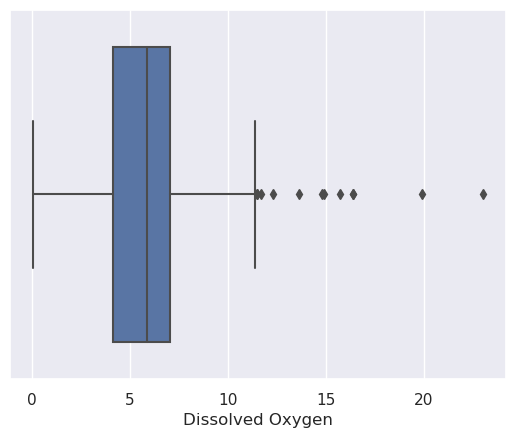

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("Dissolved Oxygen")

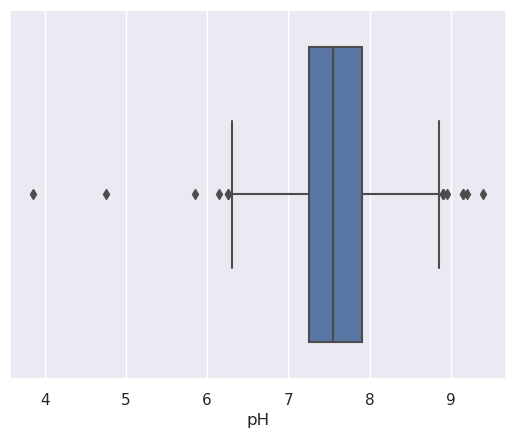

In [11]:
boxplot("pH")

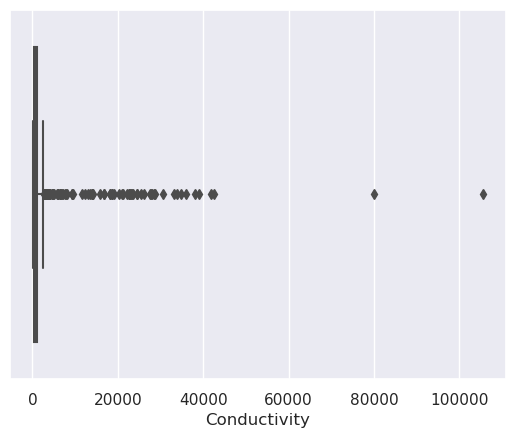

In [12]:
boxplot("Conductivity")

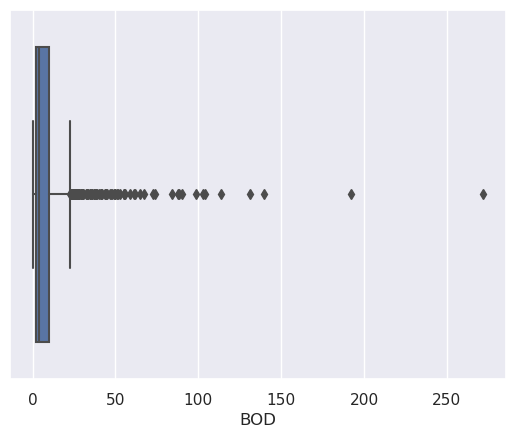

In [13]:
boxplot("BOD")

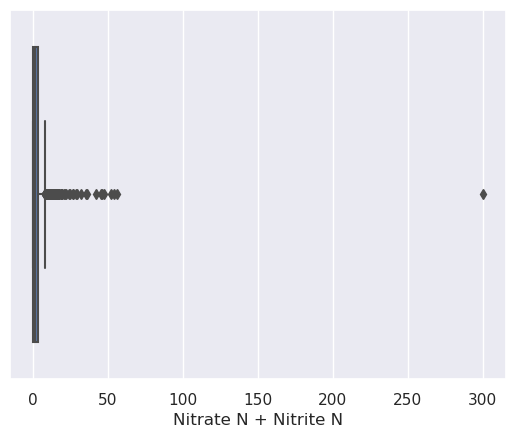

In [14]:
boxplot("Nitrate N + Nitrite N")

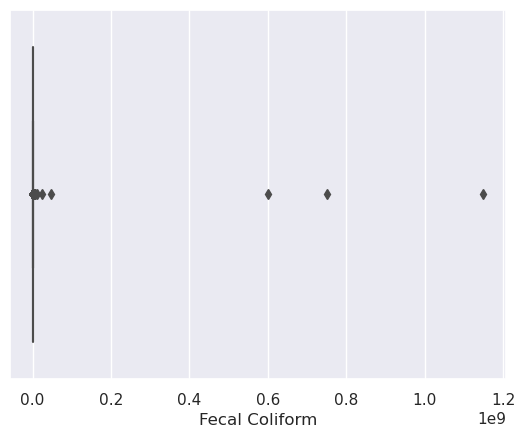

In [15]:
boxplot("Fecal Coliform")

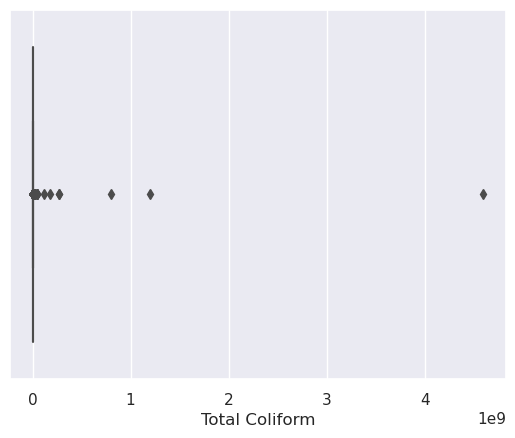

In [16]:
boxplot("Total Coliform")

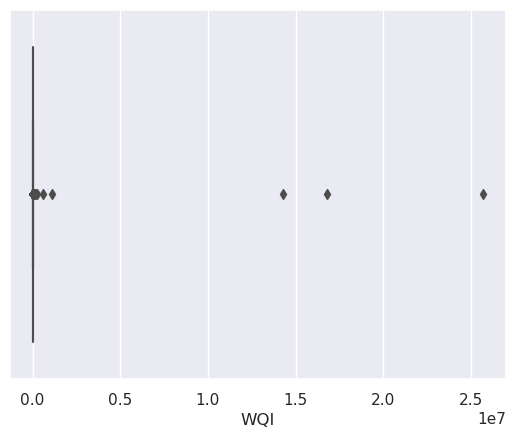

In [17]:
boxplot("WQI")

We can see that there is an extreme right skew to the data of almost all parameters, with significant outliers. This leads to nonsensical values for water quality index. Hence, we remove these extreme outliers (roughly 7.5% of the data) in order to improve the generalizability of the model 

In [18]:
df_a = df_a[df_a["WQI"]<2000]
df_a

,STN Code,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,1790,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,88.277923
1,2353,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,68.080478
2,2205,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,138.790236
3,2206,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,80.709022
4,2557,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,440.315367
...,...,...,...,...,...,...,...,...,...
1088,1765,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,88.207735
1089,2544,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,215.224834
1090,2522,7.60,7.25,21.0,1.05,0.300,90.0,160.0,49.375099
1091,2521,7.70,7.25,28.0,1.40,0.300,95.0,220.0,52.117725


# Predicting WQI with lesser parameters

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

ncols = ["Dissolved Oxygen","pH","Conductivity","BOD","Nitrate N + Nitrite N","Fecal Coliform","Total Coliform"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

s = MinMaxScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,Dissolved Oxygen,pH,Conductivity,BOD,Nitrate N + Nitrite N,Fecal Coliform,Total Coliform,WQI
0,0.358696,0.630631,0.001890,0.019886,0.000999,0.013178,2.779808e-04,76.071259
1,0.047826,0.684685,0.015698,0.101136,0.024136,0.000607,7.155942e-05,157.051491
2,0.304348,0.522523,0.000582,0.015909,0.001065,0.014528,2.779808e-04,70.985820
3,0.234783,0.729730,0.009817,0.051136,0.008989,0.017779,1.073391e-03,133.332833
4,0.250000,0.810811,0.003992,0.022727,0.004328,0.000184,1.926600e-05,84.067161
...,...,...,...,...,...,...,...,...
800,0.378261,0.657658,0.011594,0.002273,0.002147,0.000025,1.403665e-05,38.956425
801,0.247826,0.711712,0.020209,0.026705,0.001298,0.000012,9.174284e-07,77.714952
802,0.369565,0.792793,0.008065,0.066477,0.001781,0.234960,5.403653e-03,533.105647
803,0.047826,0.657658,0.014359,0.215909,0.007990,0.000773,7.715573e-05,243.606110


<Axes: >

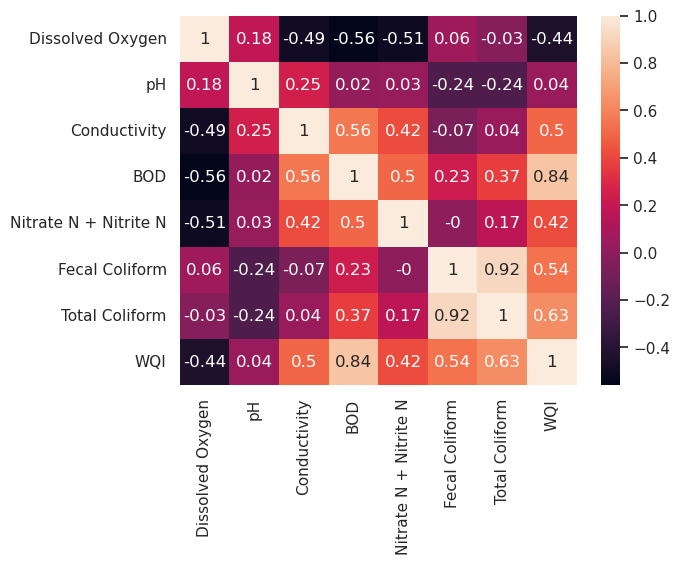

In [20]:
cmatrix = sdf.corr(method='spearman').round(2)
sns.heatmap(cmatrix,annot=True)

In order to reduce the number of features required for prediction, we can select the features with higher correlation to WQI and lesser inter correlation. Considering the top 4 highest correlations, we get BOD,Fecal Coliform,Total Coliform and Dissolved Oxygen. We see that Fecal Coliform and Total Coliform are highly correlated themselves and so it would be better to drop one of them. Thus, we can reduce the number of features required to 3.

In [21]:
selected_features = [0,3,5] # BOD,Fecal Coliform,Dissolved Oxygen
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(805, 3)


# Regression Model

The main idea for using LASSO instead of ordinary linear regression is because LASSO imposes an
$\ell ^{1}$ penalty which tends to reduce the sum of the magnitudes of the coefficients in the regression leading to it preferring sparser solutions ( more coefficients as 0). 
In case any of the coefficients are negligible, we would be able to further reduce the dimensionality.

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_squared_error

reg = LassoCV(cv=5,random_state=10).fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 12.0842758196653
R2 : 0.9980565618692444


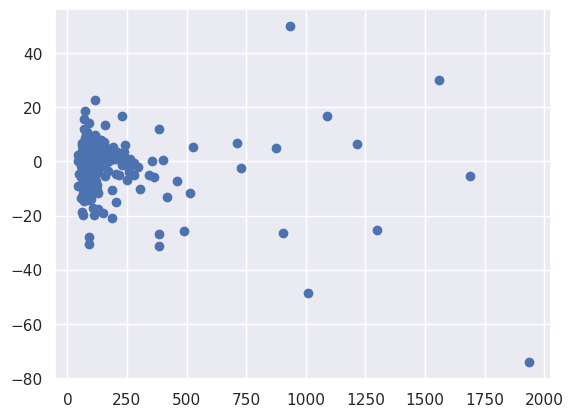

In [23]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

No bias in the residuals

In [24]:
print(reg.coef_)

[ -89.39708949  795.02724302 1920.85731531]


Since all of the coefficents are non negligible, we cannot further reduce our set of features

Accuracy = 0.9405940594059405


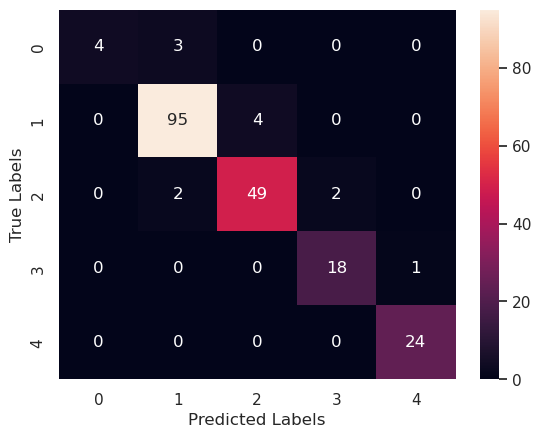

In [25]:
#testing classification accuracy
from sklearn.metrics import accuracy_score,confusion_matrix

def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)    
    
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()